In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv("wines_SPA.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df.head(5)

winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0

In [5]:
df.describe()

rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000

In [6]:
df.isnull()


winery   wine   year  rating  num_reviews  country  region  price  \
0      False  False  False   False        False    False   False  False   
1      False  False  False   False        False    False   False  False   
2      False  False  False   False        False    False   False  False   
3      False  False  False   False        False    False   False  False   
4      False  False  False   False        False    False   False  False   
...      ...    ...    ...     ...          ...      ...     ...    ...   
7495   False  False  False   False        False    False   False  False   
7496   False  False  False   False        False    False   False  False   
7497   False  False  False   False        False    False   False  False   
7498   False  False  False   False        False    False   False  False   
7499   False  False  False   False        False    False   False  False   

       type   body  acidity  
0     False  False    False  
1     False  False    False  
2     False  False    False  
3     False  False    False  
4     False  False    False  
...     ...    ...      ...  
7495  False  False    False  
7496  False  False    False  
7497  False  False    False  
7498  False  False    False  
7499  False  False    False  

[7500 rows x 11 columns]

In [7]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [8]:
df = df.dropna()
print(df.shape)

(6329, 11)


In [9]:
df=df.replace('N.V.', 'NaN')
df['year']=pd.to_datetime(df['year'])


In [10]:
df['year'] = pd.to_numeric(df['year'])


##SNS Plot

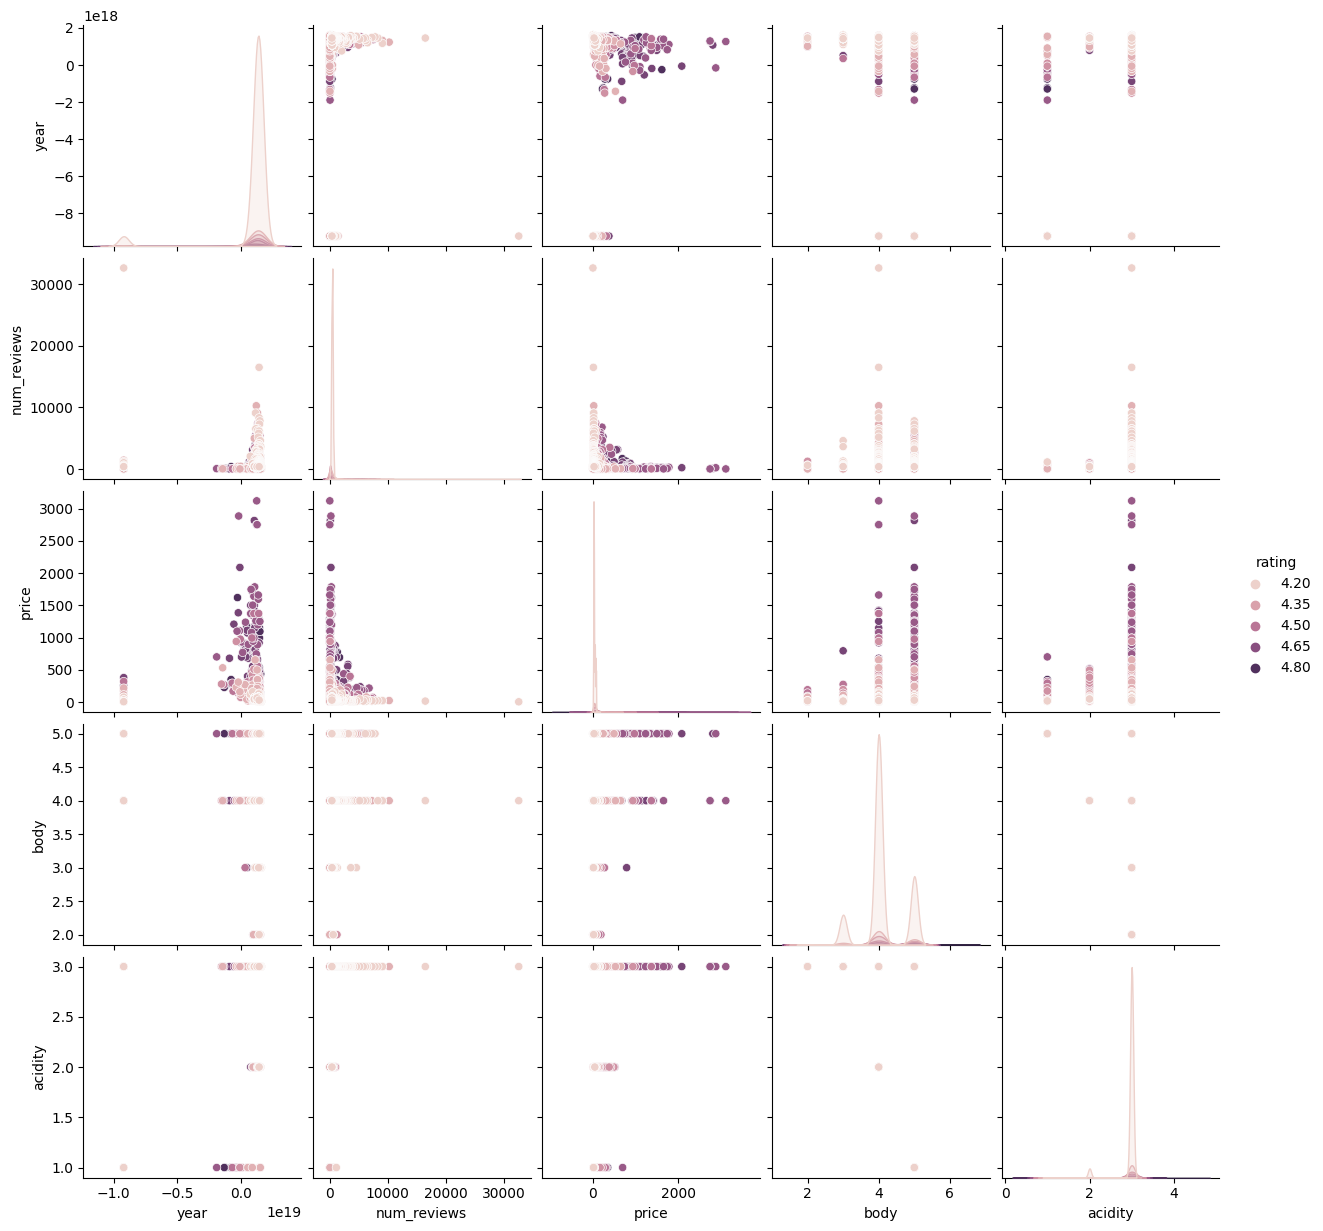

In [11]:
sns.pairplot(df,hue='rating')


##K-Means Plot

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [13]:
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [14]:
df1=df.dropna()
df1=df1.drop(['num_reviews','winery','wine','country','region','type'],axis=1)


In [15]:
df1.columns

Index(['year', 'rating', 'price', 'body', 'acidity'], dtype='object')

In [16]:
df1 = scaler.fit_transform(df1)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


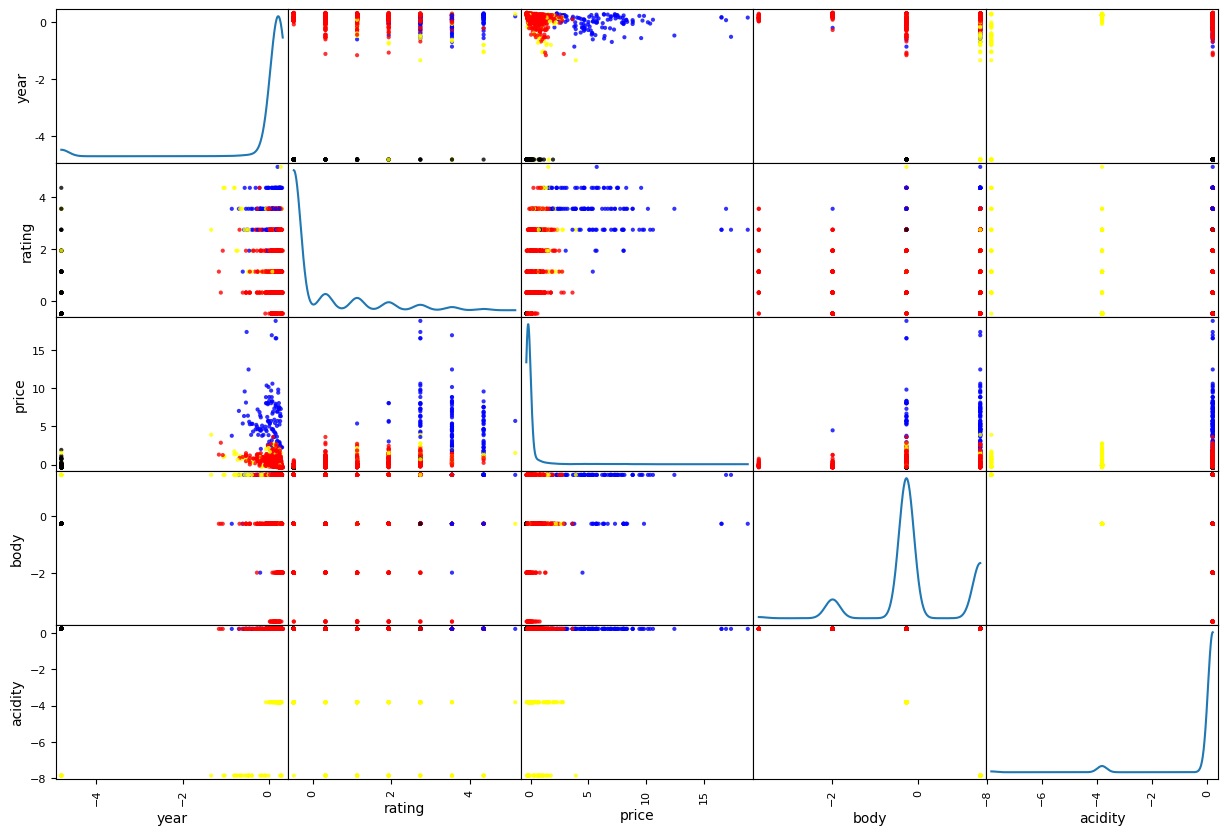

In [17]:
from sklearn.cluster import KMeans

df1 = pd.DataFrame(df1, columns=['year', 'rating', 'price', 'body', 'acidity'])
kmeans_model = KMeans(n_clusters=4, random_state=10).fit(df1)
labels = kmeans_model.labels_
color_codes = {0:'red', 1:'blue', 2:'yellow', 3:'black'}
colors = [color_codes[x] for x in labels]
pd.plotting.scatter_matrix(df1, figsize=(15,10), color=colors, alpha=0.8, diagonal='kde')
plt.show()

df1['cluster'] = labels
fig = px.scatter(df1, x='year', y='rating', color='cluster', title='Scatter Plot with KMeans Clustering')
fig.show()

##Parellel Coordinates

In [18]:
#Parallel Coordinates
df['year'] = pd.to_datetime(df['year'], unit='ns')  # Convert integer timestamps to datetime objects

df_filtered = df[(df['year'] >= '1980-01-01') & (df['year'] <= '2021-12-31')]
df_filtered = df_filtered.head(2000)

# Create plot using Plotly Express
fig = px.line(df_filtered, x='year', y='rating', color='winery', hover_data={'winery': True, 'rating': True, 'year': '|%Y-%m-%d'})

# Update layout
fig.update_layout(
    title="Rating Trends Over Time",
    xaxis_title="Year",
    yaxis_title="Rating",
    width=1200,
    height=500
)

# Show plot
fig.show()


In [19]:
#Parallel coodrinate(Rating Trends Over Time(2005 - 2020))
df['year'] = pd.to_datetime(df['year'], unit='ns')
df_filtered = df[(df['year'] >= '2005-01-01') & (df['year'] <= '2021-12-31')]
df_filtered = df_filtered.head(2000)

fig = px.line(df_filtered, x='year', y='rating', color='winery', hover_data={'winery': True, 'rating': True, 'year': '|%Y-%m-%d'})
fig.update_layout(
    title="Rating Trends Over Time(2005 - 2020)",
    xaxis_title="Year",
    yaxis_title="Rating",
    width=1200,
    height=500
)
fig.show()


##Time Series

In [20]:
#Time Series

df['year'] = pd.to_datetime(df['year'], errors='coerce')
grouped = df.groupby(['year', 'winery'])['rating'].mean().reset_index()

# Filter data for the desired year range
start_year = pd.to_datetime('1990-01-01')
end_year = pd.to_datetime('2021-12-31')
grouped_filtered = grouped[(grouped['year'] >= start_year) & (grouped['year'] <= end_year)]

# Create Plotly figure
fig = go.Figure()

# Add traces for each winery
for winery in grouped_filtered['winery'].unique():
    winery_data = grouped_filtered[grouped_filtered['winery'] == winery]
    fig.add_trace(go.Scatter(x=winery_data['year'], y=winery_data['rating'], mode='lines+markers', name=winery))

# Update layout
fig.update_layout(
    title="Time Series: Average Wine Rating Over the Years by Winery",
    xaxis_title="Year",
    yaxis_title="Average Rating",
    width=1300,
    height=800,
    showlegend=True
)

# Show plot
fig.show()


##Arc Diagram

In [21]:
#Arc Diagram

grouped = df.groupby(['winery', 'year'])['rating'].mean().reset_index()
grouped['year'] = pd.to_datetime(grouped['year'], errors='coerce')
grouped = grouped.dropna(subset=['year'])
grouped['year'] = grouped['year'].dt.year
grouped = grouped[(grouped['year'] >= 1960) & (grouped['year'] <= 2020)]
grouped = grouped.sort_values(by='year')

winery_ids = {winery: i for i, winery in enumerate(grouped['winery'].unique())}
grouped['winery_id'] = grouped['winery'].map(winery_ids)
winery_id_list = sorted(winery_ids.values())
ratings_by_winery = {winery_id: grouped[grouped['winery_id'] == winery_id]['rating'].tolist() for winery_id in winery_id_list}

fig = go.Figure()

for winery_id, ratings in ratings_by_winery.items():
    fig.add_trace(go.Scatter(x=ratings, y=[winery_id] * len(ratings), mode='lines+markers', name=grouped[grouped['winery_id'] == winery_id]['winery'].iloc[0]))

fig.update_layout(
    title="Arc Diagram: Average Wine Rating Over the Years",
    xaxis_title="Average Rating",
    yaxis_title="Winery",
    yaxis=dict(tickmode='array', tickvals=winery_id_list, ticktext=[grouped[grouped['winery_id'] == winery_id]['winery'].iloc[0] for winery_id in winery_id_list]),
    width=1500,
    height=900
)

fig.show()


In [22]:
#Arc Diagrame of certain winery

grouped = df.groupby(['winery', 'year'])['rating'].mean().reset_index()
grouped['year'] = pd.to_datetime(grouped['year'], errors='coerce').dt.year
grouped = grouped.dropna(subset=['year'])
grouped = grouped[(grouped['year'] >= 1960) & (grouped['year'] <= 2020)]
grouped = grouped.sort_values(by='year')

winery_ids = {winery: i for i, winery in enumerate(grouped['winery'].unique())}
grouped['winery_id'] = grouped['winery'].map(winery_ids)
winery_id_list = sorted(winery_ids.values())
colors = px.colors.qualitative.Plotly[:len(winery_id_list)]

ratings_by_winery = {winery_id: grouped[grouped['winery_id'] == winery_id]['rating'].tolist() for winery_id in winery_id_list}
fig = go.Figure()

for winery_id, ratings, color in zip(winery_id_list, ratings_by_winery.values(), colors):
    fig.add_trace(go.Scatter(
        x=ratings,
        y=[winery_id] * len(ratings),
        mode='lines+markers',
        name=grouped[grouped['winery_id'] == winery_id]['winery'].iloc[0],
        line=dict(color=color, width=2),
        marker=dict(color=color, size=6),
        hovertemplate="Rating: %{x}<extra>Winery: %{text}</extra>",
        text=grouped[grouped['winery_id'] == winery_id]['winery']
    ))
fig.update_layout(
    title="Arc Diagram: Average Wine Rating Over the Years",
    xaxis_title="Average Rating",
    yaxis_title="Winery",
    yaxis=dict(
        tickmode='array',
        tickvals=winery_id_list,
        ticktext=[grouped[grouped['winery_id'] == winery_id]['winery'].iloc[0] for winery_id in winery_id_list],
        tickangle=45
    ),
    width=1500,
    height=900,
    hovermode='closest'
)
fig.show()


In [23]:
#Arc Diagram of all winery individually


grouped = df.groupby(['winery', 'year'])['rating'].mean().reset_index()
grouped['year'] = pd.to_datetime(grouped['year'], errors='coerce')
grouped = grouped.dropna(subset=['year'])
grouped['year'] = grouped['year'].dt.year
grouped = grouped[(grouped['year'] >= 1960) & (grouped['year'] <= 2020)]
grouped = grouped.sort_values(by='year')

winery_ids = {winery: i for i, winery in enumerate(grouped['winery'].unique())}
grouped['winery_id'] = grouped['winery'].map(winery_ids)
winery_id_list = sorted(winery_ids.values())
ratings_by_winery = {winery_id: grouped[grouped['winery_id'] == winery_id]['rating'].tolist() for winery_id in winery_id_list}

fig = go.Figure()

# Add traces for each winery
for winery_id, ratings in ratings_by_winery.items():
    fig.add_trace(go.Scatter(x=ratings, y=[winery_id] * len(ratings), mode='lines+markers', name=grouped[grouped['winery_id'] == winery_id]['winery'].iloc[0], visible='legendonly'))

# Add dropdown menu
buttons = []
for winery_id, winery_name in zip(winery_id_list, [grouped[grouped['winery_id'] == winery_id]['winery'].iloc[0] for winery_id in winery_id_list]):
    buttons.append(dict(label=winery_name, method="update", args=[{"visible": [winery_id == i for i in range(len(winery_id_list))]}, {"title": f"Arc Diagram: {winery_name}"}]))

fig.update_layout(
    title="Arc Diagram: Select Winery",
    xaxis_title="Average Rating",
    yaxis_title="Winery",
    yaxis=dict(tickmode='array', tickvals=winery_id_list, ticktext=[grouped[grouped['winery_id'] == winery_id]['winery'].iloc[0] for winery_id in winery_id_list]),
    updatemenus=[{"buttons": buttons, "direction": "down", "showactive": True}],
    width=1200,
    height=600
)

fig.show()


##Hexbin Plot

In [24]:


data = df[['price', 'rating', 'num_reviews']].dropna()
data = data.head(500)

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=data['price'],
    y=data['rating'],
    z=data['num_reviews'],
    mode='markers',
    marker=dict(size=5, opacity=0.6, color='blue'),
    name='3D Hexbin Plot',
))

fig.update_layout(
    title='3D Hexbin Plot: Price vs Rating vs Num Reviews',
    scene=dict(
        xaxis_title='Price',
        yaxis_title='Rating',
        zaxis_title='Num Reviews'
    ),
    width=900,
    height=700
)

fig.show()


##Customized Visulization

---
we've applied KMeans clustering to group the data into four clusters. Each data point is then colored based on its cluster membership, allowing us to visually identify patterns and groupings within the data. We've customized the visualization by assigning distinct colors to each cluster, adjusting the size of the scatter matrix plot for better visibility, and adding transparency to the data points to handle overlaps. Additionally, we've included kernel density estimation (KDE) plots along the diagonal of the scatter matrix to visualize the distribution of each variable. These customizations enhance the interpretability of the visualization and aid in understanding the underlying structure of the data.


C:\Users\user\AppData\Local\Temp\ipykernel_22040\4257672501.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_22040\4257672501.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_22040\4257672501.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

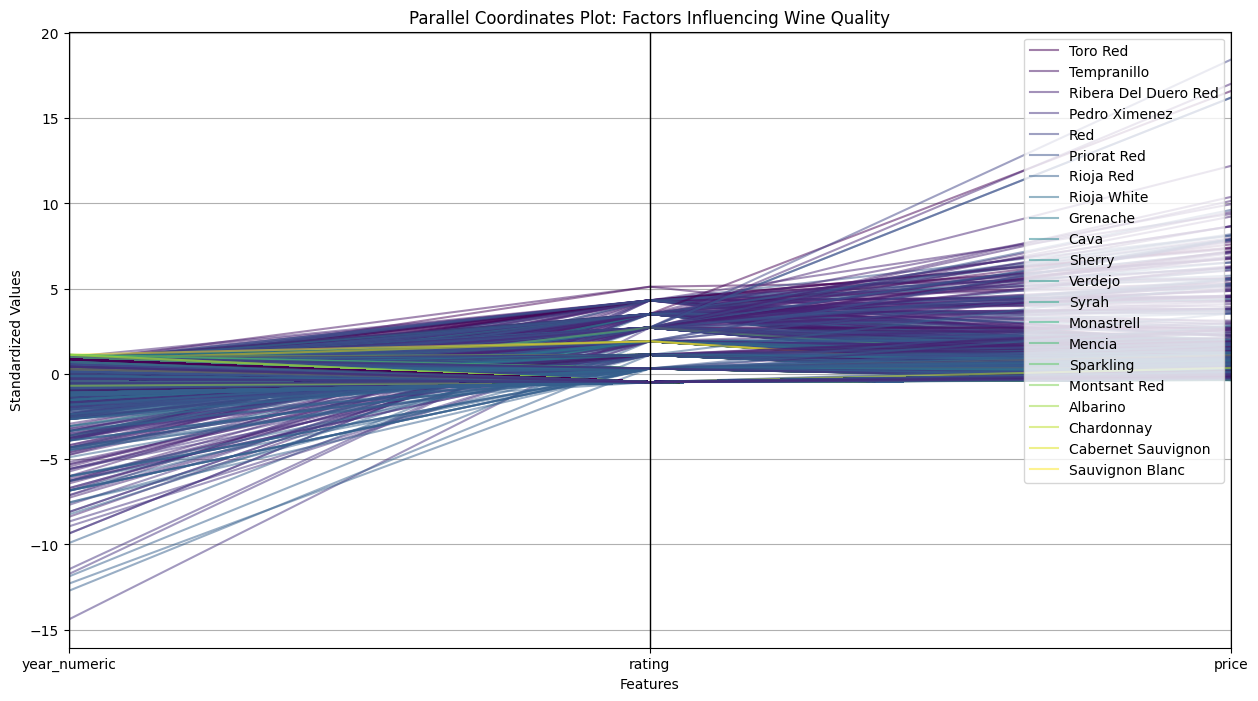

In [25]:
from pandas.plotting import parallel_coordinates

df = df.dropna()
df['year_numeric'] = (df['year'] - df['year'].min()).dt.days / 365.25
df['rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
df['price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

df_normalized = (df[['year_numeric', 'rating', 'price']] - df[['year_numeric', 'rating', 'price']].mean()) / df[['year_numeric', 'rating', 'price']].std()

df_normalized['wine_type'] = df['type']

plt.figure(figsize=(15, 8))
parallel_coordinates(df_normalized, 'wine_type', colormap='viridis', alpha=0.5)

plt.title('Parallel Coordinates Plot: Factors Influencing Wine Quality')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.legend(loc='upper right')
plt.show()
